In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [32]:
# import galaxies and clusters tables
df = pd.read_csv('../../clean-HSC-unWISE-W01.csv')
df = df.drop_duplicates(subset= ['object_id', 'id_cl'])
df_cl = pd.read_table('../../clusters.dat', delim_whitespace=True, usecols=[0,3,4,5,9,11,12], names=['id_cl','ra_cl','dec_cl','phot_z_cl', 'r500_cl','mass_cl','n500_cl'])
df_cl = df_cl[(df_cl['id_cl'].isin(df.id_cl_near)) | (df_cl['id_cl'].isin(df.id_cl))]

# evaluate the column "id_cl_near" (it's a list stored as a string, has the ids of the nearest clusters)
# it's a list and not a single value because some galaxies were near 2 or more clusters
df['id_cl_near_eval'] = [eval(s) for s in df['id_cl_near']]

(0.05, 1.65)

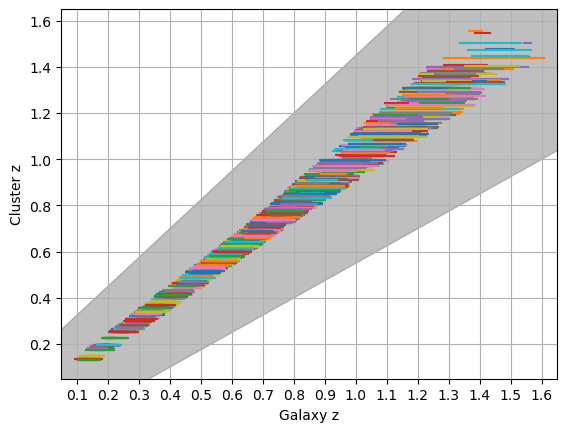

In [42]:
# function dz computes a z range, as a function of cluster's z
def dz(z):
    return 0.2 + z * 0.25

# add dz as a column of clusters' DataFrame
df_cl['d_phot_z'] = dz(df_cl['phot_z_cl'])

for i,cl in df_cl.iterrows():
    d = df[df.id_cl == cl.id_cl]
    plt.plot(d.phot_z, d.phot_z_cl)

x = np.linspace(0,1.7,50)
plt.fill_between(x, x - dz(x), x + dz(x), alpha = 0.5, color = 'grey')

# plt.scatter(lost_members.phot_z, lost_members.phot_z_cl, color = 'black', zorder = 2000, s = 5)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.grid()
plt.xlabel('Galaxy z')
plt.ylabel('Cluster z')
plt.xlim(0.05,1.65)
plt.ylim(0.05,1.65)

In [43]:
# working with a column of lists is too slow. 
# explode transforms each element in the column of lists into a separate row.
exploded_df = df.explode('id_cl_near_eval')

# create a new DataFrame with galaxies inside dz of each cluster
df_new = pd.DataFrame()
for _,c in df_cl.iterrows():
    # g = df[[any([c.id_cl== ids for ids in gal.id_cl_near]) for _,gal in df.iterrows()]]
    # g = df[df['id_cl_near'].apply(lambda x: c.id_cl in x)]
    g = exploded_df[exploded_df.id_cl_near_eval == c.id_cl]
    g = g[abs(g.phot_z - c.phot_z_cl) <= c.d_phot_z]
    df_new = pd.concat([df_new, g])

df_new = df_new.drop_duplicates(subset=['object_id','id_cl'])
# df_new = df_new.drop(columns= ['id_cl_near_eval'])

In [44]:
print(f'Members before: {df[df.member == 1].shape[0]/df.shape[0] * 100 :.2f}%   ({df[df.member == 1].shape[0]})')
print(f'Members after: {df_new[df_new.member == 1].shape[0]/df_new.shape[0] * 100 :.2f}%  ({df_new[df_new.member == 1].shape[0]})')

Members before: 35.42%   (7537)
Members after: 51.77%  (7537)


In [47]:
# some members were not in the new DataFrame, but I fixed it (it took the whole day and i wanted to die <3)

# d1 = df[df.member == 1]
# d2 = df_new[df_new.member == 1]
# lost_members = d1[~d1['object_id'].isin(d2.object_id)]
# lost_members

,ra,dec,W1,W1_err,W2,W2_err,phot_z,phot_z_err,log_st_mass,id_cl_near,...,z_sdssshape_shape22sigma,y_sdssshape_shape22sigma,id_cl_near_eval,gr,ri,iz,zy,W1g,W1i,z_cl_near
